In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (14,6)

In [2]:
file_path = r"C:\Users\CDIT BIDAR\p633 project\AAPL (5).csv"
df = pd.read_csv(file_path)

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [3]:
print("Shape:", df.shape)
df.info()

Shape: (2011, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [4]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Duplicate Rows: 0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.reset_index(drop=True, inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [7]:
Q1 = df["Volume"].quantile(0.25)
Q3 = df["Volume"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower limit:", lower)
print("Upper limit:", upper)

# Cap outliers
df["Volume"] = np.where(df["Volume"] > upper, upper,
                        np.where(df["Volume"] < lower, lower, df["Volume"]))

Lower limit: -43101325.0
Upper limit: 145397275.0


In [8]:
scaler = MinMaxScaler()

scale_cols = ['Open','High','Low','Close','Adj Close','Volume']
df_scaled = df.copy()

df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

df_scaled.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,0.012989,0.007780,0.014647,0.012545,0.007663,0.478928
1,2012-01-04,0.013353,0.009094,0.014819,0.013884,0.008797,0.400219
2,2012-01-05,0.016353,0.011428,0.016896,0.016666,0.011152,0.421198
3,2012-01-06,0.019274,0.013961,0.020910,0.019314,0.013394,0.508905
4,2012-01-09,0.022747,0.016976,0.022216,0.018908,0.013051,0.650158


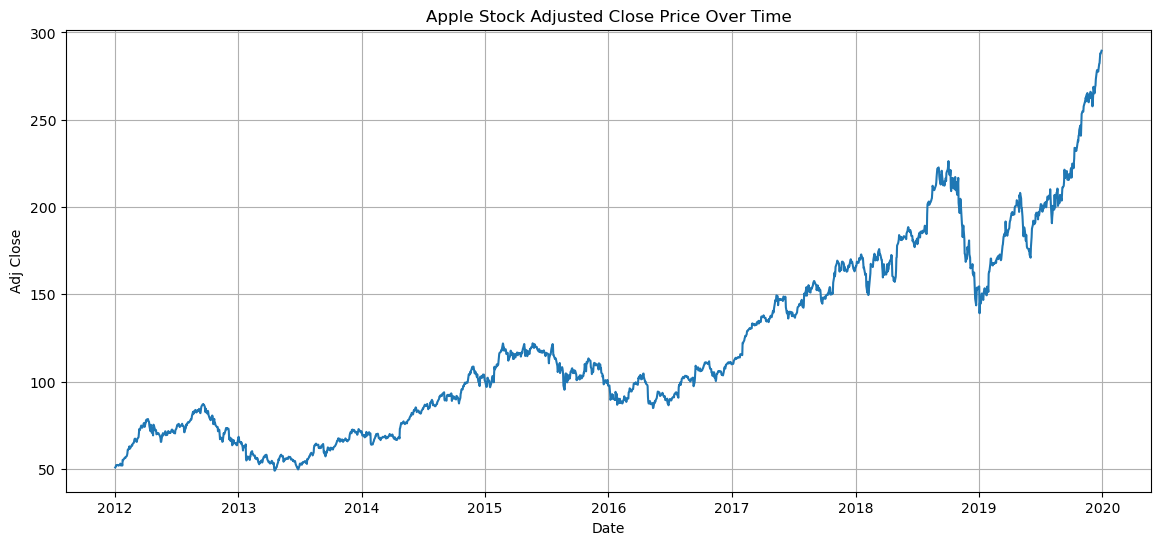

In [9]:
plt.plot(df["Date"], df["Adj Close"])
plt.title("Apple Stock Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid(True)
plt.show()

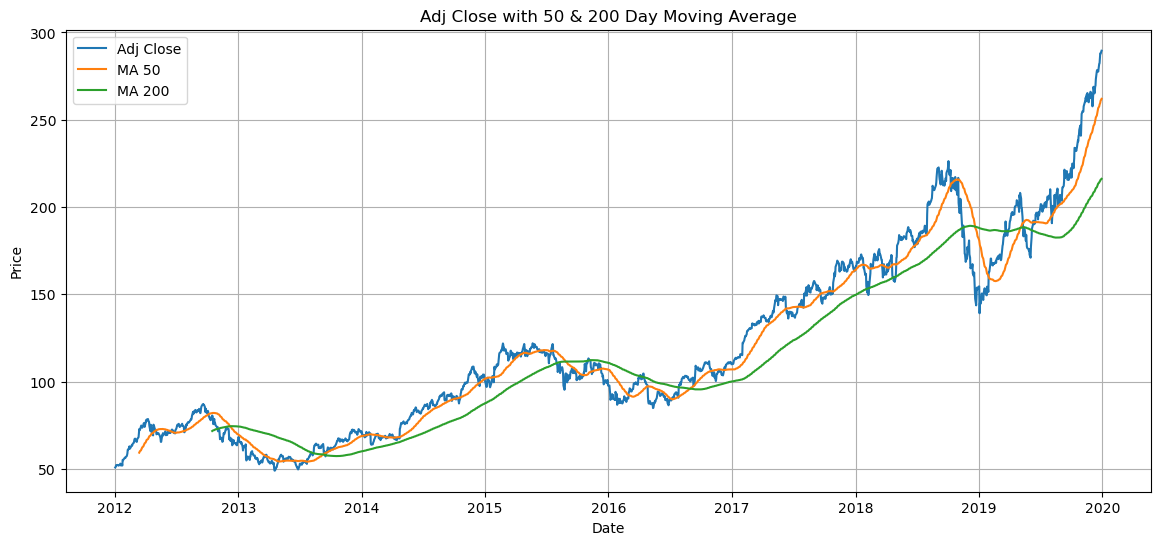

In [10]:
df["MA50"] = df["Adj Close"].rolling(50).mean()
df["MA200"] = df["Adj Close"].rolling(200).mean()

plt.plot(df["Date"], df["Adj Close"], label="Adj Close")
plt.plot(df["Date"], df["MA50"], label="MA 50")
plt.plot(df["Date"], df["MA200"], label="MA 200")
plt.title("Adj Close with 50 & 200 Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df["Daily_Return"] = df["Adj Close"].pct_change()

df[["Date","Adj Close","Daily_Return"]].head(10)

,Date,Adj Close,Daily_Return
0,2012-01-03,50.765709,NaN
1,2012-01-04,51.038536,0.005374
2,2012-01-05,51.605175,0.011102
3,2012-01-06,52.144630,0.010454
4,2012-01-09,52.061932,-0.001586
5,2012-01-10,52.248333,0.003580
6,2012-01-11,52.163139,-0.001631
7,2012-01-12,52.019955,-0.002745
8,2012-01-13,51.824898,-0.003750
9,2012-01-17,52.428562,0.011648


In [12]:
ts = df.set_index("Date")

monthly_returns = ts["Adj Close"].resample("M").ffill().pct_change()
yearly_returns = ts["Adj Close"].resample("Y").ffill().pct_change()

print("Monthly Returns Sample:")
print(monthly_returns.dropna().head())

print("\nYearly Returns Sample:")
print(yearly_returns.dropna().head())

Monthly Returns Sample:
Date
2012-02-29    0.188310
2012-03-31    0.105284
2012-04-30   -0.025970
2012-05-31   -0.010703
2012-06-30    0.010853
Freq: ME, Name: Adj Close, dtype: float64

Yearly Returns Sample:
Date
2013-12-31    0.080695
2014-12-31    0.406225
2015-12-31   -0.030137
2016-12-31    0.124804
2017-12-31    0.484643
Freq: YE-DEC, Name: Adj Close, dtype: float64


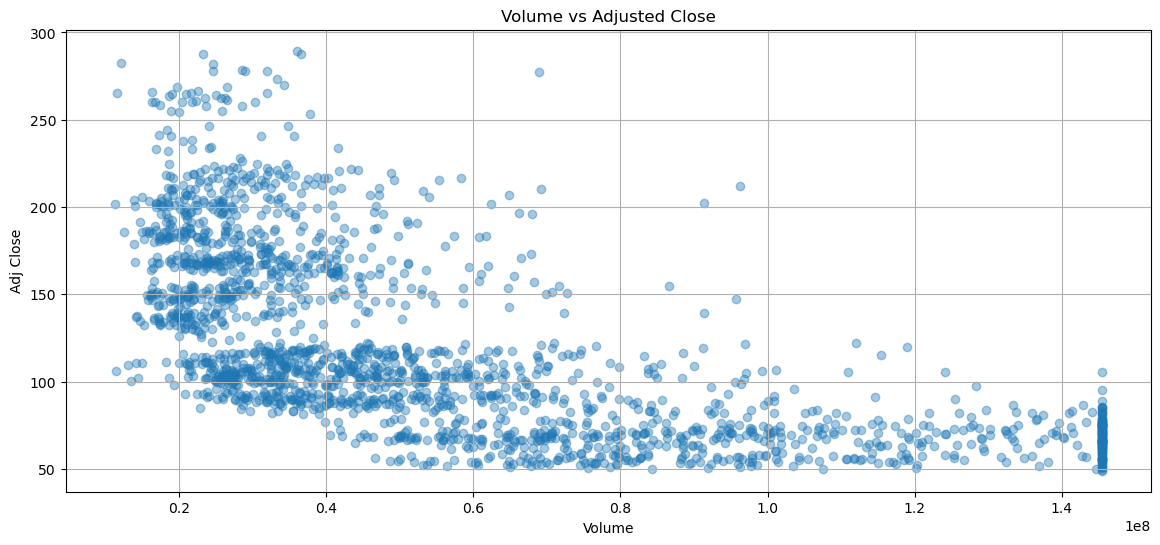

In [13]:
plt.scatter(df["Volume"], df["Adj Close"], alpha=0.4)
plt.title("Volume vs Adjusted Close")
plt.xlabel("Volume")
plt.ylabel("Adj Close")
plt.grid(True)
plt.show()

In [14]:
ts = df[["Date","Adj Close"]].copy()
ts.set_index("Date", inplace=True)

ts.head()

,Adj Close
Date,
2012-01-03,50.765709
2012-01-04,51.038536
2012-01-05,51.605175
2012-01-06,52.144630
2012-01-09,52.061932


In [15]:
train = ts.iloc[:-60]
test = ts.iloc[-60:]

print("Train:", train.shape)
print("Test :", test.shape)

Train: (1951, 1)
Test : (60, 1)


In [16]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train["Adj Close"], order=(5,1,0))
arima_fit = arima_model.fit()

arima_fit.summary()

C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1951
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4112.497
Date:                Thu, 15 Jan 2026   AIC                           8236.993
Time:                        15:33:17   BIC                           8270.447
Sample:                             0   HQIC                          8249.292
                               - 1951                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0023      0.015      0.157      0.875      -0.027       0.031
ar.L2         -0.0484      0.016     -3.037      0.002      -0.080      -0.017
ar.L3         -0.0097      0.015     -0.644      0.520      -0.039       0.020
ar.L4          0.0174      0.017      1.052      0.293      -0.015       0.050
ar.L5          0.0138      0.014      0.974      0.330      -0.014       0.041
sigma2         3.9751      0.060     65.889      0.000       3.857       4.093
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4958.41
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               6.09   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


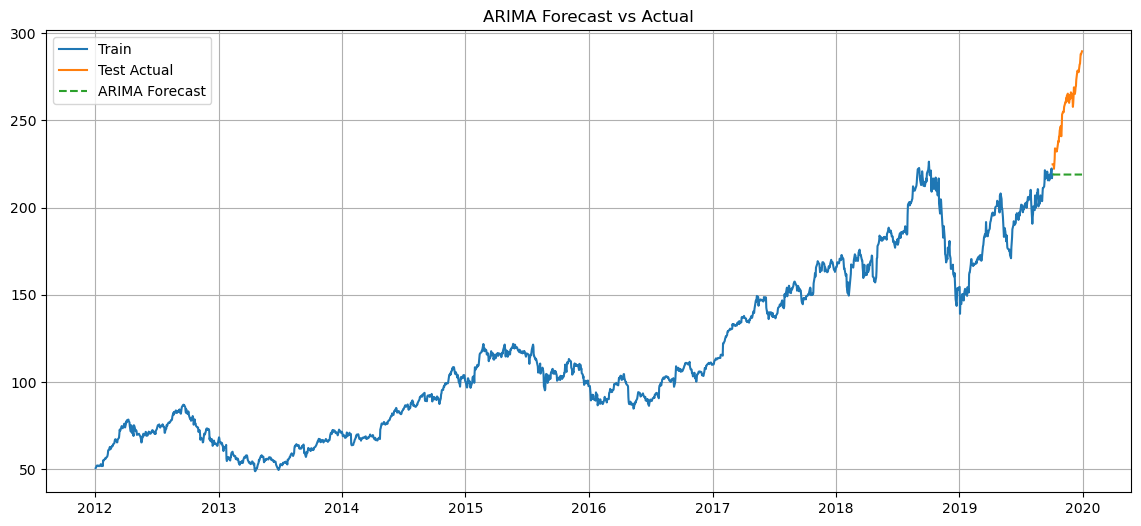

In [17]:
forecast_test = arima_fit.forecast(steps=len(test))

plt.plot(train.index, train["Adj Close"], label="Train")
plt.plot(test.index, test["Adj Close"], label="Test Actual")
plt.plot(test.index, forecast_test, label="ARIMA Forecast", linestyle="--")
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rmse = np.sqrt(mean_squared_error(test["Adj Close"], forecast_test))
mae = mean_absolute_error(test["Adj Close"], forecast_test)
mape_val = mape(test["Adj Close"], forecast_test)

print("RMSE:", rmse)
print("MAE :", mae)
print("MAPE:", mape_val)

RMSE: 41.479067267543876
MAE : 37.54988140318033
MAPE: 14.228893522229496


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train["Adj Close"], 
                       order=(1,1,1), 
                       seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

sarima_fit.summary()

C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                 1951
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4119.192
Date:                            Thu, 15 Jan 2026   AIC                           8248.384
Time:                                    15:35:33   BIC                           8276.231
Sample:                                         0   HQIC                          8258.625
                                           - 1951                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8536      0.097     -8.845      0.000      -1.043      -0.664
ma.L1          0.8771      0.089      9.836      0.000       0.702       1.052
ar.S.L12       0.0189      0.015      1.227      0.220      -0.011       0.049
ma.S.L12      -0.9994      0.101     -9.890      0.000      -1.198      -0.801
sigma2         3.9839      0.393     10.127      0.000       3.213       4.755
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):              4963.44
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               6.07   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


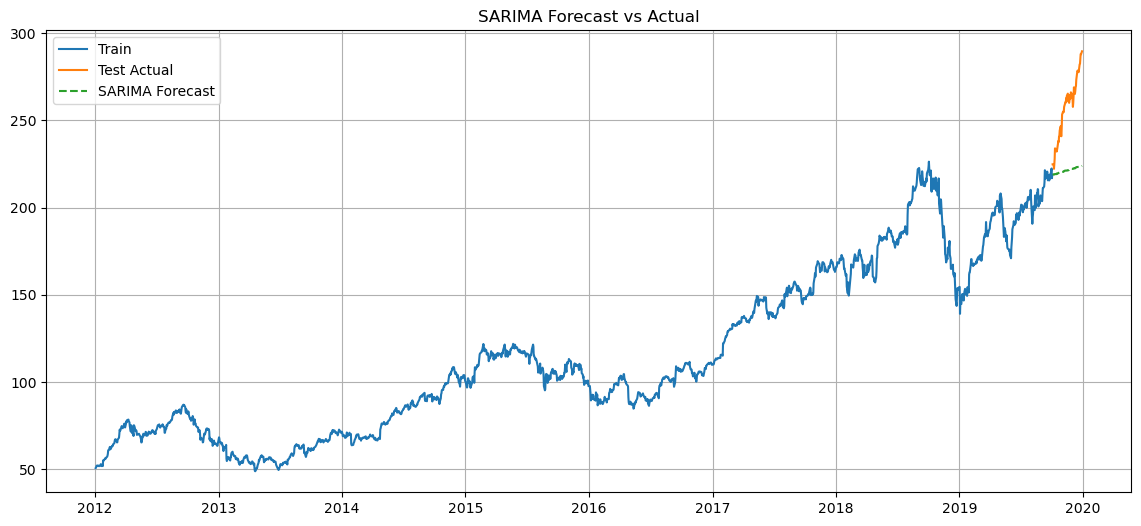

In [20]:
sarima_forecast_test = sarima_fit.forecast(steps=len(test))

plt.plot(train.index, train["Adj Close"], label="Train")
plt.plot(test.index, test["Adj Close"], label="Test Actual")
plt.plot(test.index, sarima_forecast_test, label="SARIMA Forecast", linestyle="--")
plt.title("SARIMA Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
rmse_sarima = np.sqrt(mean_squared_error(test["Adj Close"], sarima_forecast_test))
mae_sarima = mean_absolute_error(test["Adj Close"], sarima_forecast_test)
mape_sarima = mape(test["Adj Close"], sarima_forecast_test)

comparison = pd.DataFrame({
    "Model": ["ARIMA", "SARIMA"],
    "RMSE": [rmse, rmse_sarima],
    "MAE": [mae, mae_sarima],
    "MAPE": [mape_val, mape_sarima]
})

comparison

,Model,RMSE,MAE,MAPE
0,ARIMA,41.479067,37.549881,14.228894
1,SARIMA,38.731405,35.184706,13.341397


In [22]:
final_model = ARIMA(ts["Adj Close"], order=(5,1,0))
final_fit = final_model.fit()

future_forecast = final_fit.forecast(steps=30)
future_forecast

C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\CDIT BIDAR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

2011    289.562680
2012    289.678928
2013    289.773280
2014    289.823200
2015    289.858049
2016    289.859279
2017    289.862601
2018    289.865812
2019    289.867998
2020    289.868660
2021    289.868648
2022    289.868761
2023    289.868899
2024    289.868968
2025    289.868975
2026    289.868973
2027    289.868979
2028    289.868984
2029    289.868986
2030    289.868986
2031    289.868986
2032    289.868986
2033    289.868986
2034    289.868986
2035    289.868986
2036    289.868986
2037    289.868986
2038    289.868986
2039    289.868986
2040    289.868986
Name: predicted_mean, dtype: float64

In [23]:
future_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=30)

forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Forecast_Adj_Close": future_forecast.values
})

forecast_df.head(10)

,Date,Forecast_Adj_Close
0,2019-12-31,289.562680
1,2020-01-01,289.678928
2,2020-01-02,289.773280
3,2020-01-03,289.823200
4,2020-01-04,289.858049
5,2020-01-05,289.859279
6,2020-01-06,289.862601
7,2020-01-07,289.865812
8,2020-01-08,289.867998
9,2020-01-09,289.868660


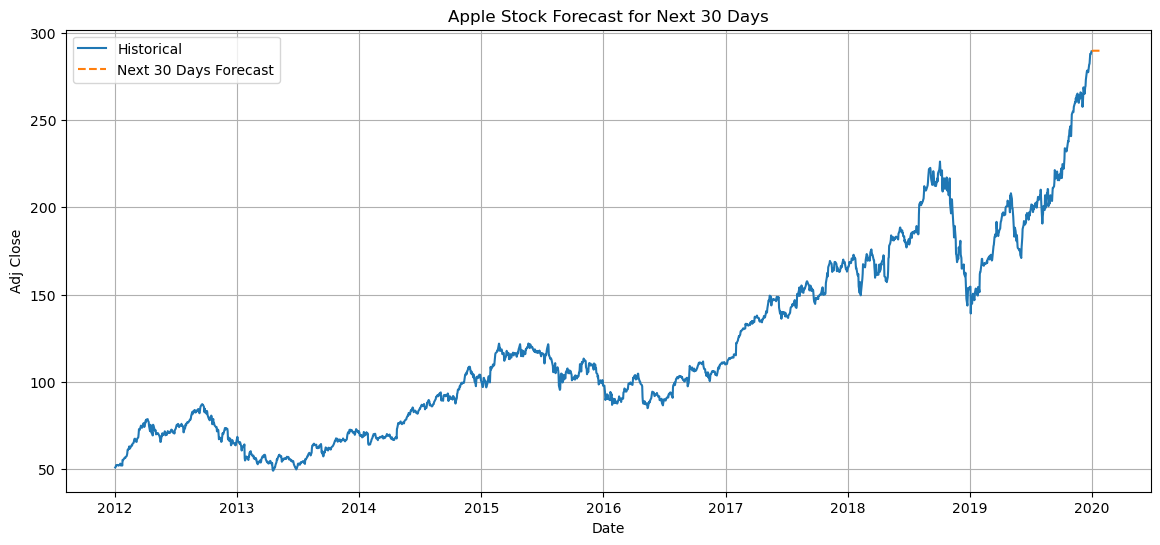

In [24]:
plt.plot(ts.index, ts["Adj Close"], label="Historical")
plt.plot(forecast_df["Date"], forecast_df["Forecast_Adj_Close"], label="Next 30 Days Forecast", linestyle="--")
plt.title("Apple Stock Forecast for Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
forecast_df.to_csv(r"C:\Users\CDIT BIDAR\p633 project\AAPL_30days_forecast.csv", index=False)
print("✅ Forecast CSV saved successfully!")

✅ Forecast CSV saved successfully!
